# FarmOG Station - Dataset Exploration
## Tomato Disease Classification Dataset

This notebook explores the dataset and provides visualizations of class distribution and sample images.

In [1]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import PIL
import warnings
warnings.filterwarnings('ignore')

print("🌱 FarmOG Station - Agricultural AI System")
print("=" * 50)

🌱 FarmOG Station - Agricultural AI System


## Setup Directories

In [2]:
# Create necessary directories
os.makedirs('docs', exist_ok=True)
os.makedirs('models', exist_ok=True)
print("✅ Directories created/verified")

✅ Directories created/verified


## Locate Dataset

In [3]:
# Find the data directory
data_raw = Path(r"C:\Users\diogo\IRONHACK\FINAL PROJECT - FarmOG station\data\raw\New Plant Diseases Dataset(Augmented)")

print(f"Checking: {data_raw.absolute()}\n")
contents = list(data_raw.iterdir())
print("Contents:")
for item in contents:
    print(f"  {'📁' if item.is_dir() else '📄'} {item.name}")

Checking: C:\Users\diogo\IRONHACK\FINAL PROJECT - FarmOG station\data\raw\New Plant Diseases Dataset(Augmented)

Contents:
  📁 New Plant Diseases Dataset(Augmented)
  📁 train


## Find Train/Valid Folders

In [4]:
# Find train folder - PRIORITY: Use nested directory with Tomato classes
train_dir = None
valid_dir = None

# FIRST: Check the nested "New Plant Diseases Dataset(Augmented)" folder (has Tomato classes)
nested_path = data_raw / "New Plant Diseases Dataset(Augmented)"
if nested_path.exists():
    if (nested_path / "train").exists():
        train_dir = nested_path / "train"
        print(f"✅ Using nested train directory (contains Tomato classes)")
    if (nested_path / "valid").exists():
        valid_dir = nested_path / "valid"

# FALLBACK: Check other locations only if nested path not found
if train_dir is None:
    for item in contents:
        if item.name == "train" and item.is_dir():
            train_dir = item
        elif item.name == "valid" and item.is_dir():
            valid_dir = item
        elif item.is_dir():
            # Check nested folders
            if (item / "train").exists():
                train_dir = item / "train"
            if (item / "valid").exists():
                valid_dir = item / "valid"

if train_dir is None:
    print("\n❌ Could not find train folder!")
    print("Please check the data directory structure")
else:
    print(f"\n✅ Found train folder: {train_dir}")
    if valid_dir:
        print(f"✅ Found valid folder: {valid_dir}")
    
    # Show what's in the train folder
    print(f"\nFirst 5 folders in train directory:")
    for item in sorted(train_dir.iterdir())[:5]:
        if item.is_dir():
            print(f"  📁 {item.name}")

✅ Using nested train directory (contains Tomato classes)

✅ Found train folder: C:\Users\diogo\IRONHACK\FINAL PROJECT - FarmOG station\data\raw\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train
✅ Found valid folder: C:\Users\diogo\IRONHACK\FINAL PROJECT - FarmOG station\data\raw\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid

First 5 folders in train directory:
  📁 Apple___Apple_scab
  📁 Apple___Black_rot
  📁 Apple___Cedar_apple_rust
  📁 Apple___healthy
  📁 Blueberry___healthy


## Get Class Names (Tomato Only)

In [5]:
# Get all class names and filter for tomato only
classes = sorted([d.name for d in train_dir.iterdir() if d.is_dir()])
tomato_classes = [c for c in classes if 'tomato' in c.lower()]

print(f"Total classes in dataset: {len(classes)}")
print(f"Tomato classes found: {len(tomato_classes)}")

if len(tomato_classes) == 0:
    print("\n❌ ERROR: No Tomato classes found!")
    print("\nAvailable classes in this directory:")
    for i, cls in enumerate(classes[:15], 1):  # Show first 15
        print(f"  {i}. {cls}")
    print("\n⚠️ Please verify the train directory path points to Tomato disease classes")
else:
    print(f"\n✅ Found {len(tomato_classes)} Tomato disease classes:")
    for i, cls in enumerate(tomato_classes, 1):
        display_name = cls.replace('Tomato___', '').replace('___', ' - ').replace('_', ' ')
        print(f"{i:2}. {display_name}")

Total classes in dataset: 38
Tomato classes found: 10

✅ Found 10 Tomato disease classes:
 1. Bacterial spot
 2. Early blight
 3. Late blight
 4. Leaf Mold
 5. Septoria leaf spot
 6. Spider mites Two-spotted spider mite
 7. Target Spot
 8. Tomato Yellow Leaf Curl Virus
 9. Tomato mosaic virus
10. healthy


## Count Images Per Class

In [6]:
# Count images in each class
class_counts = {}

if len(tomato_classes) > 0:
    for cls in tomato_classes:
        count = len(list((train_dir / cls).glob("*.jpg"))) + \
                len(list((train_dir / cls).glob("*.JPG"))) + \
                len(list((train_dir / cls).glob("*.jpeg")))
        class_counts[cls] = count
    
    # Display counts
    print("\nImage counts per class:")
    for cls, count in class_counts.items():
        display_name = cls.replace('Tomato___', '').replace('___', ' - ').replace('_', ' ')
        print(f"  {display_name:<35} {count:>6} images")
    
    total_images = sum(class_counts.values())
    print(f"\n✅ Total images: {total_images:,}")
    if len(tomato_classes) > 0:
        print(f"✅ Average per class: {total_images // len(tomato_classes):,}")
else:
    print("❌ No classes found. Cannot count images.")


Image counts per class:
  Bacterial spot                        3404 images
  Early blight                          3840 images
  Late blight                           3702 images
  Leaf Mold                             3764 images
  Septoria leaf spot                    3490 images
  Spider mites Two-spotted spider mite   3482 images
  Target Spot                           3654 images
  Tomato Yellow Leaf Curl Virus         3922 images
  Tomato mosaic virus                   3580 images
  healthy                               3852 images

✅ Total images: 36,690
✅ Average per class: 3,669


## Visualize Class Distribution

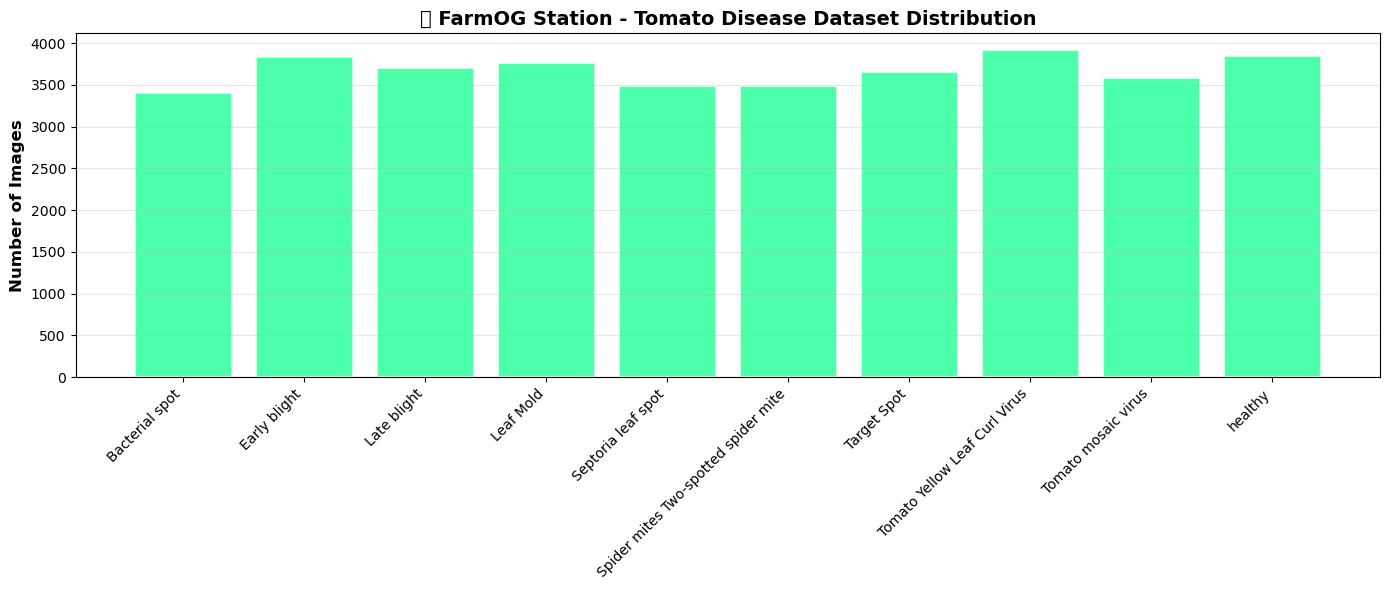

✅ Plot saved to: docs/class_distribution.png


In [7]:
# Create bar chart of class distribution
if len(class_counts) > 0:
    plt.figure(figsize=(14, 6))
    plt.bar(range(len(class_counts)), list(class_counts.values()), 
            color='#00ff88', alpha=0.7, edgecolor='white', linewidth=1.5)
    plt.xticks(range(len(class_counts)), 
               [c.replace('Tomato___', '').replace('___', ' - ').replace('_', ' ') for c in class_counts.keys()], 
               rotation=45, ha='right')
    plt.ylabel('Number of Images', fontsize=12, fontweight='bold')
    plt.title('🌱 FarmOG Station - Tomato Disease Dataset Distribution', 
              fontsize=14, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('docs/class_distribution.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("✅ Plot saved to: docs/class_distribution.png")
else:
    print("❌ No classes to visualize")

## Visualize Sample Images from Each Class

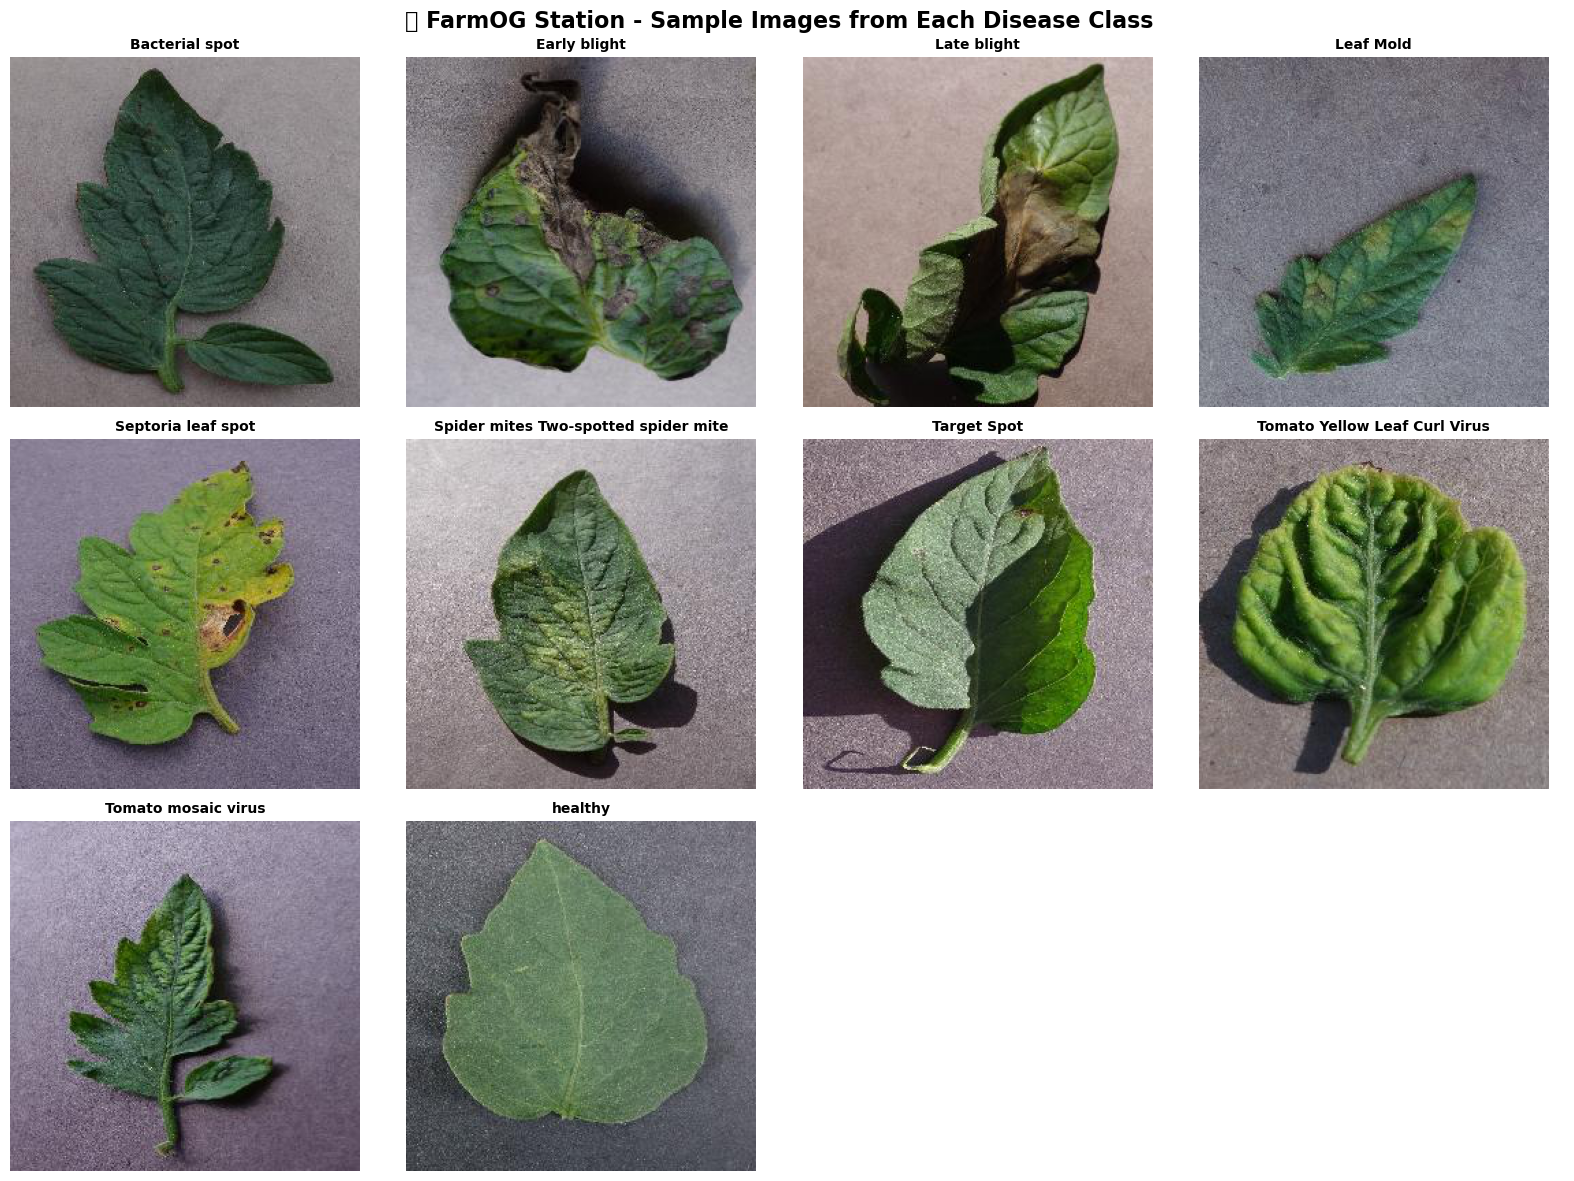

✅ Sample images saved to: docs/sample_images.png


In [8]:
# Create grid of sample images
if len(tomato_classes) == 0:
    print("❌ No tomato classes found. Please check the data directory.")
else:
    num_classes = len(tomato_classes)
    rows = (num_classes + 3) // 4
    fig, axes = plt.subplots(rows, 4, figsize=(16, rows*4))
    fig.suptitle('🌱 FarmOG Station - Sample Images from Each Disease Class', 
                 fontsize=16, fontweight='bold')
    
    # Handle single row case
    if rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.ravel()
    
    for i, cls in enumerate(tomato_classes):
        img_files = list((train_dir / cls).glob("*.jpg")) + \
                    list((train_dir / cls).glob("*.JPG")) + \
                    list((train_dir / cls).glob("*.jpeg"))
        
        if img_files:
            img_path = img_files[0]
            img = PIL.Image.open(img_path)
            axes[i].imshow(img)
            axes[i].set_title(cls.replace('Tomato___', '').replace('___', ' - ').replace('_', ' '), 
                             fontsize=10, fontweight='bold')
            axes[i].axis('off')
    
    # Hide extra subplots
    for i in range(num_classes, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.savefig('docs/sample_images.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("✅ Sample images saved to: docs/sample_images.png")

## Summary Statistics

In [9]:
# Print final summary
if len(tomato_classes) > 0 and len(class_counts) > 0:
    print("\n" + "="*50)
    print("📊 EDA COMPLETE!")
    print("="*50)
    print(f"\nDataset Summary:")
    print(f"  • Total classes: {len(tomato_classes)}")
    print(f"  • Total images: {sum(class_counts.values()):,}")
    print(f"  • Average images per class: {sum(class_counts.values()) // len(tomato_classes):,}")
    print(f"  • Min images in a class: {min(class_counts.values()):,}")
    print(f"  • Max images in a class: {max(class_counts.values()):,}")
    print(f"\nVisualizations saved:")
    print(f"  ✅ docs/class_distribution.png")
    print(f"  ✅ docs/sample_images.png")
    print("\n" + "="*50)
else:
    print("\n" + "="*50)
    print("⚠️ EDA INCOMPLETE - No classes found")
    print("="*50)
    print("\nPlease check:")
    print("  • Data directory path is correct")
    print("  • Train folder exists and contains class folders")
    print("  • Class folders contain image files")


📊 EDA COMPLETE!

Dataset Summary:
  • Total classes: 10
  • Total images: 36,690
  • Average images per class: 3,669
  • Min images in a class: 3,404
  • Max images in a class: 3,922

Visualizations saved:
  ✅ docs/class_distribution.png
  ✅ docs/sample_images.png

